### Processamento de Sinais Biológicos

Lista de exercícios 2
 
1. Um sinal de EEG foi coletado a 1 ksamples/s e armazenado em uma matriz ASCII (erp.txt). Cada linha da matriz corresponde a uma repetição do experimento e cada coluna a um instante de tempo. A unidade do sinal está em mV.
    a) Faça um gráfico com as escalas de tempo (ms) e amplitude (mv) para uma das repetições. 
    b) Faça um filtro média com os respectivos números de repetição e faça um gráfico para cada um deles com a escala de tempo (ms) e amplitude (mV):  
    A. 10  
    B. 100  
    C. 500  
    D. 1000  


2. Determine a amplitude, latência e duração do pulso.
 
3. Estime o SNR desse sinal.
 


In [1]:
import numpy as np
import matplotlib.pyplot as plt

fs = 1000

def plot_signal(signal, title=''):
    t = np.arange(0, len(signal)/fs, 1/fs)
    t = t*1000  # ms
    plt.figure(figsize=(15, 3))
    limit = max(signal)*1.1
    limit = 1 if limit < 1 else limit
    plt.ylim(top=limit, bottom=-limit)
    plt.xlabel('Time (ms)')
    plt.ylabel('Amplitude (mV)')
    plt.title(title)
    plt.plot(t, signal, scaley=False)
    
with open('erp.txt') as f:
    raw_data = f.readlines()

data = []
for line in raw_data:
    data.append([float(l) for l in line.split()])

data = np.array(data)

### 1-a) Plot Time(ms) and amplitude for one trial

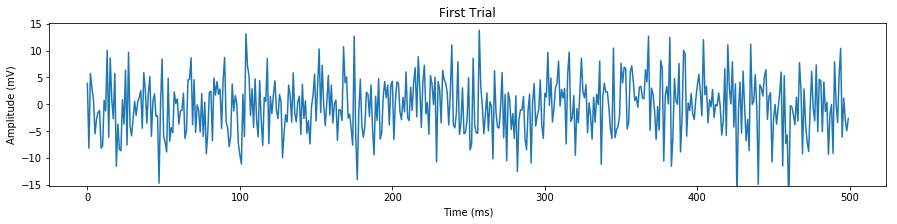

In [2]:
plot_signal(data[0], 'First Trial')

### 1-b) Mean filter for: 10, 100, 500 and 1000 repetitions

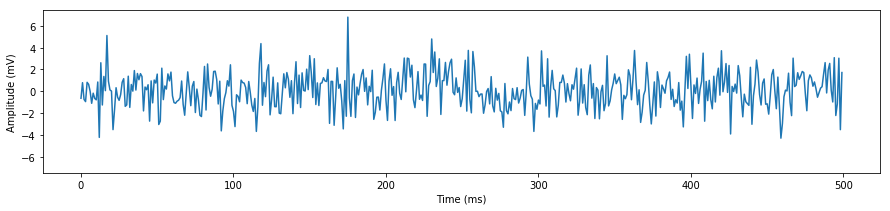

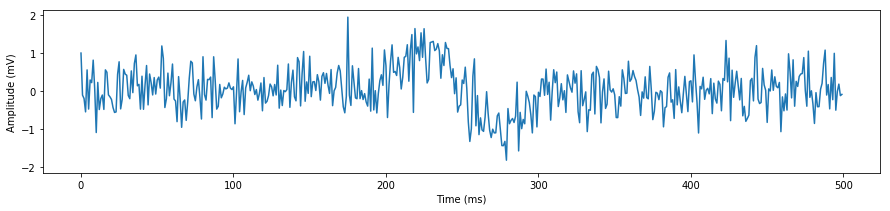

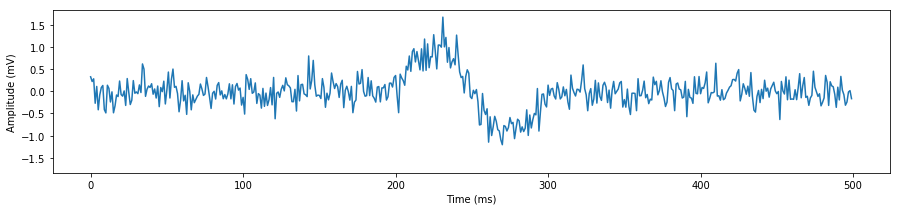

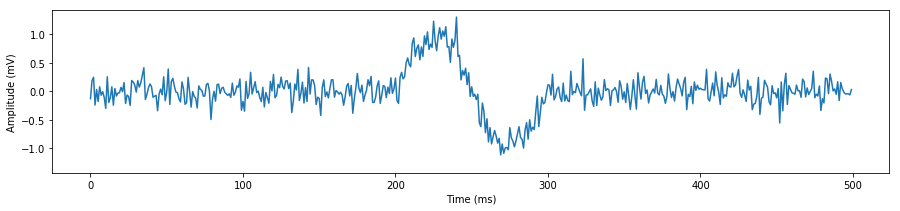

In [3]:
repetitions = [10, 100, 500, 1000]

for n in repetitions:
    filtered = sum(data[:n])/n
    plot_signal(filtered)

### 2 - Determine amplitude, latency and pulse-width

In [4]:
amplitude = max(filtered)
amplitude

1.3035928517270101

#### Answer:  
Based on the last graph of previous question and the code above:  
- Amplitude: 2.42 mV  
- Latency = 200ms (0-200 ms from the graph)
- Pulse-width = 100ms (201-300 ms from the graph)

### 3 - Estimate SNR  of the signal

In [5]:
n = len(filtered)
As = np.sqrt(sum(filtered**2)/n)
Ar = np.sqrt(sum(data[0]**2)/n)
snr = (As/Ar)**2
snr

0.004333772830033377

In [6]:
snr_db = 20*np.log10(As/Ar)
snr_db

-23.63133857494439